<a href="https://colab.research.google.com/github/alexpatri/artificial-intelligence/blob/main/1-1-inconsistentes-e-faltantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré processamento de dados

# Importação das bibliotecas básicas

In [1]:
import pandas as pd
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Exploração dos dados

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
#Importar dataset
base_credit = pd.read_csv('/content/drive/MyDrive/ia/data/credit_data.csv')

In [ ]:
#Exibir dataset
base_credit

In [ ]:
#Exibir as 10 primeiras linhas do dataset
base_credit.head(10)

In [ ]:
#Exibit as 10 últimas linhas do dataset
base_credit.tail(10)

In [ ]:
#Descrição dos dados
base_credit.describe()

In [ ]:
#Informações dos dados
base_credit.info()

### Tratamento de valores inconsistentes

In [ ]:
base_credit.default.value_counts()

In [ ]:
#Pegar os valores menores que zero na coluna de idades
base_credit.loc[base_credit['age'] < 0]

In [ ]:
# Apagar a coluna inteira (de todos os registros da base de dados)

base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

In [ ]:
# Checar o indice
base_credit.index

In [ ]:
#Checar o indice mediante condicional de idade

base_credit[base_credit['age'] < 0].index

In [ ]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

In [ ]:
base_credit3['age'].mean()

In [ ]:
# Vamos averiguar se foi excluído
base_credit3.loc[base_credit3['age']<0]

In [ ]:
# calcular a media da base de dados
base_credit.mean()

In [ ]:
# Calcular a media de uma coluna na base de dados
base_credit['age'].mean()

In [ ]:
# Calcular a media da coluna onde os numeros são maiores que zero
base_credit['age'][base_credit['age'] > 0].mean()

In [ ]:
# Atribuir a media a coluna
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

### Tratamento de valores faltantes

In [ ]:
# checar se há valores nulos
base_credit.isnull()
base_credit.isna()

In [ ]:
# Somar a quantidade de valores nulos
base_credit.isnull().sum()

In [ ]:
# Pegar a coluna da idade nas linhas onde tem valores nulos
base_credit.loc[pd.isnull(base_credit['age'])]

In [ ]:
# Preencher as linhas com as medias das idades
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [ ]:
# Verificar se há valores nulos
base_credit.loc[pd.isnull(base_credit['age'])]

In [ ]:
base = base_credit.loc[:, 'age'].values

In [ ]:
type(base)

In [ ]:
# Verificar pelos valores contidos

In [ ]:
import numpy as np

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(base_credit.iloc[:, 1:3])


In [ ]:
base_credit.iloc[:, 1:3] = imputer.transform(base_credit.iloc[:, 1:3])

### Problema de Distribuição

In [ ]:
import random
random.seed(32)

In [ ]:
#Importar dataset
base_credit = pd.read_csv('credit_data.csv')

In [ ]:
ran_int = random.sample(range(0,len(base_credit)),200)

In [ ]:
import numpy as np

In [ ]:
base_credit.loc[ran_int,'age'] = np.nan

In [ ]:
base_credit[base_credit['age'] <= 0] = np.nan

<Axes: xlabel='age', ylabel='Count'>

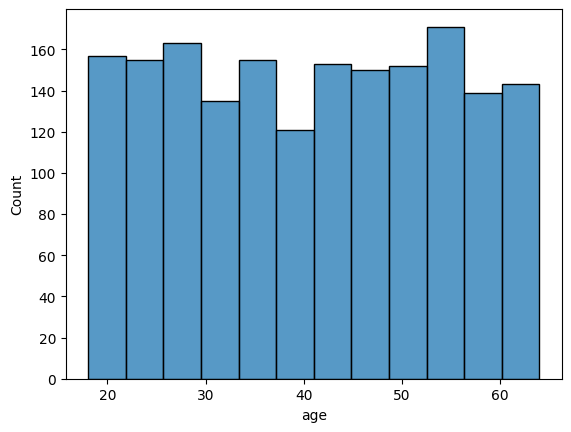

In [ ]:
import seaborn as sns
sns.histplot(data = base_credit, x = 'age')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(base_credit.loc[:, ['age']])
base_credit.loc[:, ['age']] = imputer.transform(base_credit.loc[:, ['age']])

<Axes: xlabel='age', ylabel='Count'>

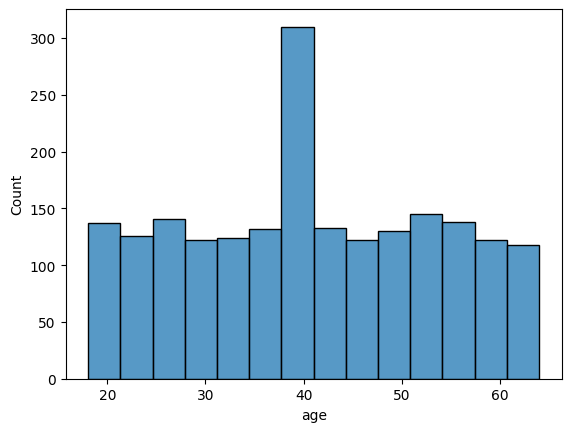

In [ ]:
sns.histplot(data = base_credit, x = 'age')